In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
import math
from scipy import stats 
from scipy.stats import boxcox, lognorm, norm, normaltest, shapiro
from scipy.optimize import curve_fit
import seaborn as sb
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler
from math import exp, expm1
from curlyBrace import curlyBrace
from matplotlib.patches import Polygon

%matplotlib inline

In [200]:
from print_versions import print_versions

print_versions(globals())


json==2.0.9
pandas==2.1.4
numpy==1.26.3
scipy==1.14.1
seaborn==0.12.2
statsmodels==0.14.0
matplotlib==3.8.0


## **1. Statistical Method**

### Impart Data from spreadsheet

In [202]:
data=pd.read_csv("AnalyticalModel.csv")
y=data.loc[1:109, "Plume length.1"]
y=pd.to_numeric(y)
data.head()

,Site No.,Aquifer thickness,Plume length,Plume length.1,ED,EA (O2),"Ham (W= 3M, ath=0.1)","Ham (W= 5M, ath=0.1)","Chu (W= 3M, ath=0.1)","Chu (W= 5M, ath=0.1)","Liedl, atv=0.01","Liedl, atv=0.001","Maier, atv=0.01","Maier, atv=0.001"
0,NaN,[m],[ft],[m],[mg/l],[mg/l],(m),(m),(m),(m),(m),(m),(m),(m)
1,1.0,7.62,1650,502.92,21.475,5.9,54320.5559291039,150890.4331364,134030.599466876,372307.220741323,6498.77254719783,64987.7254719784,6029.5262425228,60295.262425228
2,2.0,9.144,900,274.32,3.552,6.9,1564.63164277278,4346.19900770217,3860.57383689847,10723.8162136069,4077.85729218749,40778.5729218749,4828.45839318913,48284.5839318913
3,3.0,3.048,750,228.6,28,7.1,10202.8436650228,28341.232402841,25174.5076849838,69929.188013844,1067.64916918087,10676.4916918087,988.208827115888,9882.08827115888
4,4.0,6.096,3000,914.4,0.447,0.8,819.250906322315,2275.69696200643,2021.42058765879,5615.05718794108,1889.82536758417,18898.2536758417,2199.39926843513,21993.9926843513


### Fig1: Threshold Line for Underestimation and Overestimation 

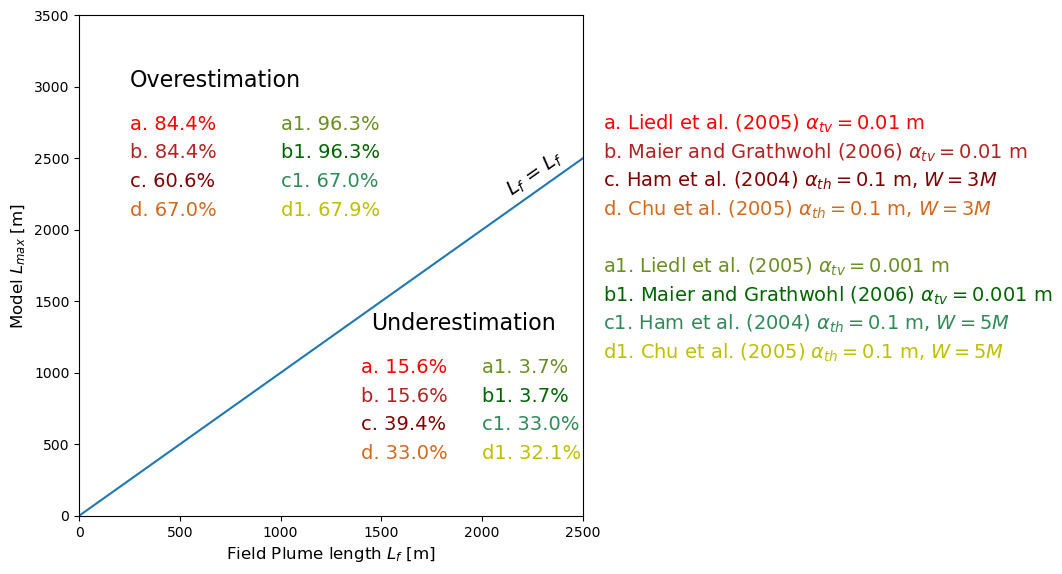

In [204]:
# Fig 1 
plt.figure(figsize=(6.5,6.5))
x=np.linspace(0,2500, 2500)
y45=x
plt.plot(x,y45)
plt.ylim(0, 3500)
plt.text(1450, 1300, "Underestimation", fontsize=16)
plt.text(250, 3000, "Overestimation", fontsize=16)
plt.xlim([0, 2500])
plt.ylim([0, 3500])
plt.xlabel("Field Plume length $L_f$ [m]", fontsize=12)
plt.ylabel("Model $L_{max}$ [m]", fontsize=12)
#overestimation

plt.text(250, 2700, "a. 84.4%", {'color': 'r', 'fontsize': 14})
plt.text(250, 2500, "b. 84.4%", {'color': 'firebrick', 'fontsize': 14})
plt.text(250, 2300, "c. 60.6%", {'color': 'maroon', 'fontsize': 14})
plt.text(250, 2100, "d. 67.0%", {'color': 'chocolate', 'fontsize': 14})

plt.text(1000, 2700, "a1. 96.3%", {'color': 'olivedrab', 'fontsize': 14})
plt.text(1000, 2500, "b1. 96.3%", {'color': 'darkgreen', 'fontsize': 14})
plt.text(1000, 2300, "c1. 67.0%", {'color': 'seagreen', 'fontsize': 14})
plt.text(1000, 2100, "d1. 67.9%", {'color': 'y', 'fontsize': 14})

#Underestimation
plt.text(1400, 1000, "a. 15.6%", {'color': 'r', 'fontsize': 14})
plt.text(1400, 800, "b. 15.6%", {'color': 'firebrick', 'fontsize': 14})
plt.text(1400, 600, "c. 39.4%", {'color': 'maroon', 'fontsize': 14})
plt.text(1400, 400, "d. 33.0%", {'color': 'chocolate', 'fontsize': 14})

plt.text(2000, 1000, "a1. 3.7%", {'color': 'olivedrab', 'fontsize': 14})
plt.text(2000, 800, "b1. 3.7%", {'color': 'darkgreen', 'fontsize': 14})
plt.text(2000, 600, "c1. 33.0%", {'color': 'seagreen', 'fontsize': 14})
plt.text(2000, 400, "d1. 32.1%", {'color': 'y', 'fontsize': 14})

plt.text(2600, 2700, "a. Liedl et al. (2005) $\u03B1_{tv}=0.01$ m", {'color': 'r', 'fontsize': 14})
plt.text(2600, 2500, "b. Maier and Grathwohl (2006) $\u03B1_{tv}=0.01$ m", {'color': 'firebrick', 'fontsize': 14})
plt.text(2600, 2300, "c. Ham et al. (2004) $\u03B1_{th}=0.1$ m, $W=3M$", {'color': 'maroon', 'fontsize': 14})
plt.text(2600, 2100, "d. Chu et al. (2005) $\u03B1_{th}=0.1$ m, $W=3M$", {'color': 'chocolate', 'fontsize': 14})

plt.text(2600, 1700, "a1. Liedl et al. (2005) $\u03B1_{tv}=0.001$ m", {'color': 'olivedrab', 'fontsize': 14})
plt.text(2600, 1500, "b1. Maier and Grathwohl (2006) $\u03B1_{tv}=0.001$ m", {'color': 'darkgreen', 'fontsize': 14})
plt.text(2600, 1300, "c1. Ham et al. (2004) $\u03B1_{th}=0.1$ m, $W=5M$", {'color': 'seagreen', 'fontsize': 14})
plt.text(2600, 1100, "d1. Chu et al. (2005) $\u03B1_{th}=0.1$ m, $W=5M$", {'color': 'y', 'fontsize': 14})


plt.annotate('$L_f$ = $L_f$', fontsize=14,
             xy=(2100, 2200),                    
             rotation=35,                  
             va='bottom',                    
             ha='left',                      
            )

plt.savefig("fig1.png", dpi = 300, bbox_inches="tight")
plt.savefig("fig1.pdf", dpi = 300, bbox_inches="tight")

### Fig2: Normality test: QQplot

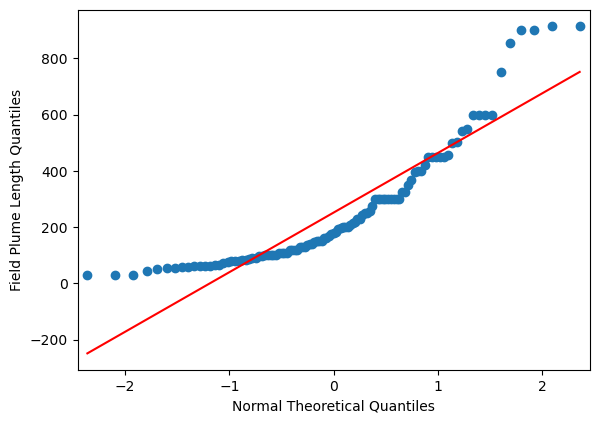

In [206]:
# Fig2

qqplot(y, line='s', color=(0.0, 0.0, 1.0, 1))
plt.subplots_adjust(left=0.2, right=1, top=0.95, bottom=0.2)
plt.xlabel("Normal Theoretical Quantiles")
plt.ylabel("Field Plume Length Quantiles")
plt.savefig('fig2.png', dpi = 300)
plt.savefig('fig2.pdf', dpi = 300)

### Normality Tests (D’Agostino’s)

In [208]:
# 1. D’Agostino’s K^2 Test

stat, p = normaltest(y)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Normally Distributed (fail to reject H0)')
else:
    print('Sample does not look Normally Distributed (reject H0)')

Statistics=35.198, p=0.000
Sample does not look Normally Distributed (reject H0)


### Normality Tests (Shapiro-Wilk) 

In [210]:
# 2. Shapiro-Wilk Test

stat3, p3=shapiro(y)

print('Statistics=%.3f, p=%.3f' % (stat3, p3))
alpha = 0.05

if p3 > alpha:
    print('Sample looks Normally Distributed (fail to reject H0)')
else:
    print('Sample does not look Normally Distributed (reject H0)')

Statistics=0.828, p=0.000
Sample does not look Normally Distributed (reject H0)


### Field Plume Length data TEST against 81 distributions

In [212]:
# Distribution tests

size = len(y)
ys=sorted(y)
sc=StandardScaler() # Standardize features by removing the mean and scaling to unit variance.
yy=np.array([ys])
yy=yy.reshape((yy.shape[1], 1))
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()
y_std
del yy

import warnings
warnings.filterwarnings("ignore")

dist_names = ['beta', 'expon','gamma','lognorm','norm','pearson3','triang','uniform','weibull_min', 'weibull_max','alpha','anglit',
              'arcsine','betaprime','bradford','burr','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang',"exponweib", 'exponpow','f',
              'fatiguelife', "fisk", "foldcauchy", "foldnorm", "gausshyper", 
              "genexpon","genextreme", "gengamma", "genhalflogistic", "genlogistic", "genpareto", "gompertz", 
              "gumbel_l", "gumbel_r","halfcauchy", "halflogistic", "halfnorm", "hypsecant", "invgamma", "invgauss", "invweibull", 
              "johnsonsb", "johnsonsu", "laplace", "logistic", "loggamma", "loglaplace", "lomax", "maxwell", "mielke", "rayleigh", 
              "rice", "recipinvgauss", "semicircular", "t", "truncexpon", "truncnorm", "tukeylambda",
              "vonmises","wald", "wrapcauchy", "ksone", "kstwobign", "nakagami", "ncx2", "ncf", "nct", "pareto", "powerlaw",
             "powerlognorm", "powernorm", "rdist",]

# Set up empty lists to store results
Chi_Square = []
p_values = []


percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(stats, distribution)
    param = dist.fit(y_std)


In [213]:
# Distribution tests

size = len(y)
ys=sorted(y)
sc=StandardScaler()
yy=np.array([ys])
yy=yy.reshape((yy.shape[1], 1))
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()
y_std
del yy

#Now we will fit 81 different distributions, rank them by the approximate chi-squared goodness of fit, and report the Kolmogorov-Smirnov (KS) P value results. Remember that we want chi-squared to be as low as possible, and ideally we want the KS P-value to be >0.05.

#Python may report warnings while running the distributions.

# Set list of distributions to test
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

# Turn off code warnings (this is not recommended for routine use)

import warnings
warnings.filterwarnings("ignore")

# Set up list of candidate distributions to use
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

dist_names = ['beta', 'expon','gamma','lognorm','norm','pearson3','triang','uniform','weibull_min', 'weibull_max','alpha','anglit',
              'arcsine','betaprime','bradford','burr','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','exponweib',
              'exponpow','f','fatiguelife', "fisk", "foldcauchy", "foldnorm", "gausshyper", 
              "genexpon","genextreme", "gengamma", "genhalflogistic", "genlogistic", "genpareto", "gompertz", 
              "gumbel_l", "gumbel_r","halfcauchy", "halflogistic", "halfnorm", "hypsecant", "invgamma", "invgauss", "invweibull", 
              "johnsonsb", "johnsonsu", "laplace", "logistic", "loggamma", "loglaplace", "lomax", "maxwell", "mielke", 
              "nakagami", "ncx2", "ncf", "nct", "pareto", "powerlaw", "powerlognorm", "powernorm", "rdist", 
              "rayleigh", "rice", "recipinvgauss", "semicircular", "t", "truncexpon", "truncnorm", "tukeylambda",
              "vonmises","wald", "wrapcauchy", "ksone", "kstwobign"]

# Set up empty lists to store results
Chi_Square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins

percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)    
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    Chi_Square.append(ss)
        
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['P_Value'] = p_values
results['Chi_Square'] = Chi_Square

results.sort_values(['Chi_Square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------\n----------------------------------------')
print (results)
np.savetxt("Field81dist.csv", results, delimiter=",", fmt='%s')


Distributions sorted by goodness of fit:
----------------------------------------
----------------------------------------
     Distribution  P_Value   Chi_Square
26    fatiguelife  0.62808     9.151660
67  recipinvgauss  0.74272     9.378033
47      johnsonsb  0.94659     9.837362
74           wald  0.48373     9.963956
62   powerlognorm  0.71289    11.000392
..            ...      ...          ...
19         cosine  0.00000   685.145161
7         uniform  0.00000   759.287558
38       gumbel_l  0.00000   869.316681
76          ksone  0.00000   969.703336
9     weibull_max  0.00000  1943.261639

[78 rows x 3 columns]


In [214]:
# Top 10 Distributions

df=results[0:10]
rank=["1",'2','3','4','5','6','7','8','9','10']
df.set_index("Distribution", inplace=False)
df["Ranking"]=rank
df

,Distribution,P_Value,Chi_Square,Ranking
26,fatiguelife,0.62808,9.151660,1
67,recipinvgauss,0.74272,9.378033,2
47,johnsonsb,0.94659,9.837362,3
74,wald,0.48373,9.963956,4
62,powerlognorm,0.71289,11.000392,5
45,invgauss,0.45991,11.353601,6
3,lognorm,0.44567,12.224517,7
48,johnsonsu,0.44002,12.238079,8
28,foldcauchy,0.32509,13.779663,9
27,fisk,0.41023,14.016610,10


### Fig3: CDF and overestimation threshold

In [216]:
#Creating cdf from plume length data (Lf)

def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_ecdf(a):
    x, y = ecdf(a)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    plt.plot(x, y,"+", markersize=12, label= "field data")
    plt.legend()

0.6520816122786884


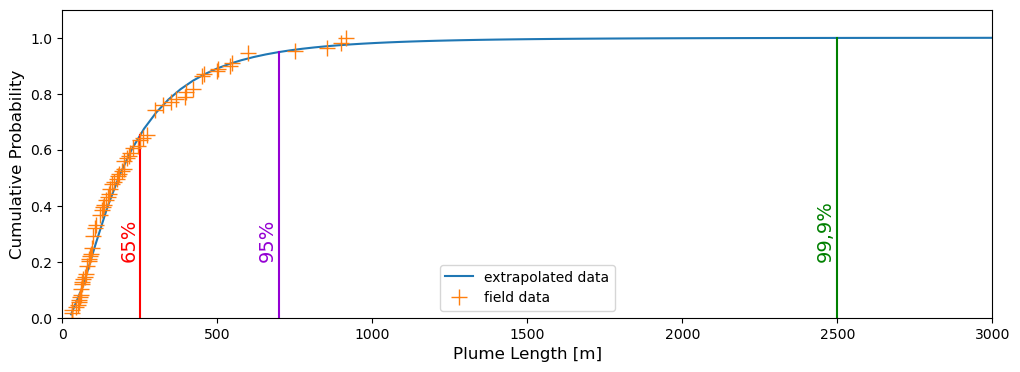

In [217]:
# Fig 3
scatter,location,mean = stats.lognorm.fit(y,floc=0)
x = np.linspace(y.min()-2,y.max()+3000,100)
pdf = stats.lognorm.pdf(x,scatter,location,mean)
cdf=stats.lognorm.cdf(x, scatter, location, mean) # extrapolated


cdf2500=stats.lognorm.cdf(2500, scatter, location, mean) # 
cdf250=stats.lognorm.cdf(250, scatter, location, mean)
cdf700=stats.lognorm.cdf(700, scatter, location, mean)


y2500=np.linspace(0,cdf2500, 100)
x2500=np.linspace(2500,2500,100)
y250=np.linspace(0,cdf250, 100)
x250=np.linspace(250, 250, 100)
y700=np.linspace(0, cdf700, 100)
x700=np.linspace(700, 700, 100)

plt.figure(figsize=(12, 4))
plt.plot(x, cdf, label = "extrapolated data")
plt.plot(x2500,y2500, 'green')
plt.legend()
plt.plot(x250, y250, 'red')
plt.plot(x700, y700, 'darkviolet')
plot_ecdf(y)
plt.xlim([0, 3000])
plt.ylim([0,1.1])
plt.xlabel("Plume Length [m]", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)

plt.annotate('99,9%', color='green', fontsize=14, xy=(2430,0.2), rotation=90, va='bottom', ha='left')
plt.annotate('95%', color='darkviolet', fontsize=14, xy=(630,0.2), rotation=90, va='bottom', ha='left')
plt.annotate('65%', color='red', fontsize=14, xy=(185,0.2), rotation=90, va='bottom', ha='left')

plt.savefig("fig3.pdf", dpi=300)
plt.savefig("fig3.png", dpi=300)
print(cdf250)

### Fig4: Statistical method result

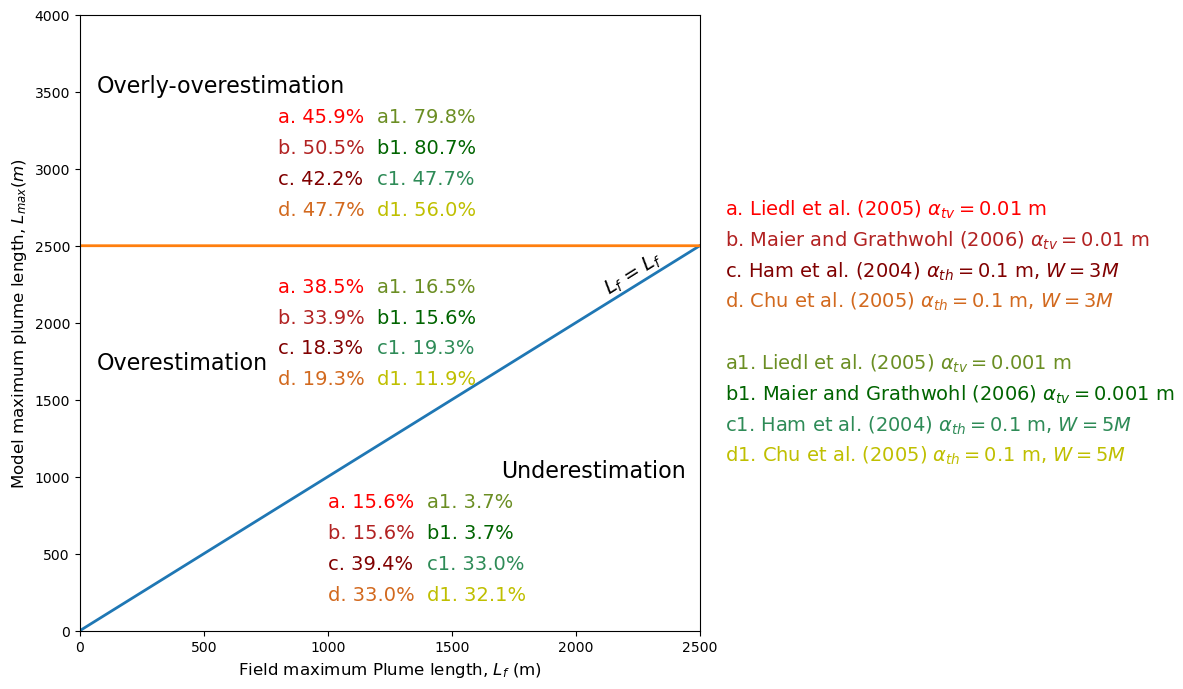

In [219]:
# Fig 4
plt.figure(figsize=(8,8))
x=np.linspace(0,2500, 2500)
y45=x
yt=np.linspace(2500,2500,len(x))
plt.plot(x,y45, lw=2)
plt.plot(x, yt, lw=2)
plt.ylim(0, 3500)
plt.text(1700, 1000, "Underestimation", fontsize=16)
plt.text(70, 1700, "Overestimation", fontsize=16)
plt.text(70, 3500, "Overly-overestimation", fontsize=16)
plt.xlim([0, 2500])
plt.ylim([0, 4000])

#Overestimation
h1=800
v1=3300
plt.text(h1, v1, "a. 45.9%", {'color': 'r', 'fontsize': 14})
plt.text(h1, v1-200, "b. 50.5%", {'color': 'firebrick', 'fontsize': 14})
plt.text(h1, v1-400, "c. 42.2%", {'color': 'maroon', 'fontsize': 14})
plt.text(h1, v1-600, "d. 47.7%", {'color': 'chocolate', 'fontsize': 14})

h2=1200
v2=3300
plt.text(h2, v2, "a1. 79.8%", {'color': 'olivedrab', 'fontsize': 14})
plt.text(h2, v2-200, "b1. 80.7%", {'color': 'darkgreen', 'fontsize': 14})
plt.text(h2, v2-400, "c1. 47.7%", {'color': 'seagreen', 'fontsize': 14})
plt.text(h2, v2-600, "d1. 56.0%", {'color': 'y', 'fontsize': 14})

# Acceptable Range
h3=800
v3=2200
plt.text(h3, v3, "a. 38.5%", {'color': 'r', 'fontsize': 14})
plt.text(h3, v3-200, "b. 33.9%", {'color': 'firebrick', 'fontsize': 14})
plt.text(h3, v3-400, "c. 18.3%", {'color': 'maroon', 'fontsize': 14})
plt.text(h3, v3-600, "d. 19.3%", {'color': 'chocolate', 'fontsize': 14})

h4=1200
v4=2200
plt.text(h4, v4, "a1. 16.5%", {'color': 'olivedrab', 'fontsize': 14})
plt.text(h4, v4-200, "b1. 15.6%", {'color': 'darkgreen', 'fontsize': 14})
plt.text(h4, v4-400, "c1. 19.3%", {'color': 'seagreen', 'fontsize': 14})
plt.text(h4, v4-600, "d1. 11.9%", {'color': 'y', 'fontsize': 14})

#Underestimation
h5=1000
v5=800
plt.text(h5, v5, "a. 15.6%", {'color': 'r', 'fontsize': 14})
plt.text(h5, v5-200, "b. 15.6%", {'color': 'firebrick', 'fontsize': 14})
plt.text(h5, v5-400, "c. 39.4%", {'color': 'maroon', 'fontsize': 14})
plt.text(h5, v5-600, "d. 33.0%", {'color': 'chocolate', 'fontsize': 14})

h6=1400
v6=800
plt.text(h6, v6, "a1. 3.7%", {'color': 'olivedrab', 'fontsize': 14})
plt.text(h6, v6-200, "b1. 3.7%", {'color': 'darkgreen', 'fontsize': 14})
plt.text(h6, v6-400, "c1. 33.0%", {'color': 'seagreen', 'fontsize': 14})
plt.text(h6, v6-600, "d1. 32.1%", {'color': 'y', 'fontsize': 14})

plt.text(2600, 2700, "a. Liedl et al. (2005) $\u03B1_{tv}=0.01$ m", {'color': 'r', 'fontsize': 14})
plt.text(2600, 2500, "b. Maier and Grathwohl (2006) $\u03B1_{tv}=0.01$ m", {'color': 'firebrick', 'fontsize': 14})
plt.text(2600, 2300, "c. Ham et al. (2004) $\u03B1_{th}=0.1$ m, $W=3M$", {'color': 'maroon', 'fontsize': 14})
plt.text(2600, 2100, "d. Chu et al. (2005) $\u03B1_{th}=0.1$ m, $W=3M$", {'color': 'chocolate', 'fontsize': 14})

plt.text(2600, 1700, "a1. Liedl et al. (2005) $\u03B1_{tv}=0.001$ m", {'color': 'olivedrab', 'fontsize': 14})
plt.text(2600, 1500, "b1. Maier and Grathwohl (2006) $\u03B1_{tv}=0.001$ m", {'color': 'darkgreen', 'fontsize': 14})
plt.text(2600, 1300, "c1. Ham et al. (2004) $\u03B1_{th}=0.1$ m, $W=5M$", {'color': 'seagreen', 'fontsize': 14})
plt.text(2600, 1100, "d1. Chu et al. (2005) $\u03B1_{th}=0.1$ m, $W=5M$", {'color': 'y', 'fontsize': 14})
plt.xlabel("Field maximum Plume length, $L_f$ (m)", fontsize=12)
plt.ylabel("Model maximum plume length, $L_{max} (m)$", fontsize=12)

plt.annotate('$L_f$ = $L_f$', fontsize=14,
             xy=(2100, 2150),                    
             rotation=32,                  
             va='bottom',                    
             ha='left',                      
            )

plt.savefig("fig4.pdf", dpi= 300, bbox_inches="tight")
plt.savefig("fig4.png", dpi= 300, bbox_inches="tight")

## **2. AIC Method**

In [221]:
#BoxCox transformation
yb = stats.boxcox(y,lmbda=0.05, alpha=None)


# Model names in csv file:
# Liedl, atv=0.01 , Liedl, atv=0.001 , k=5
# Maier, atv=0.01 , Maier, atv=0.001 , k=5 
# Ham (W= 5M, ath=0.1) , Ham (W= 3M, ath=0.1) , k= 5 
# Chu (W= 3M, ath=0.1) , Chu (W= 5M, ath=0.1) , k= 6 
ym=data.loc[1:109, "Chu (W= 3M, ath=0.1)"] # copy + paste the mode name within " " from the list.
k=6

ym=pd.to_numeric(ym)

#BoxCox transformation
ymb = stats.boxcox(ym,lmbda=0.05, alpha=None)


# AIC=N*ln(L)+2K+0.5Noe+2Nue,  Ln(L)=sse/N where Ln(L): log-likelihood, sse: sum of squared errors, Noe: overestimation, Nue: underestimation, K: #of parameters

sse=sum(pow((yb-ymb), 2))
Noe = 0
Nue=0
Nac=0
j=0

for i in ymb:
    if i>(2500**0.05 - 1) / 0.05:
        Noe=Noe+1
    elif i<yb[j]:
        Nue=Nue+1
    else:
       Nac=Nac+1
    j=j+1

print("Noe:", Noe)
print("Noe (%):", round(Noe/len(yb)*100, 1),"%")
print("Nue:", Nue)
print("Nue (%):", round(Nue/len(yb)*100, 1),"%")
print("Nac:", Nac)
print("Nac (%):", round(Nac/len(yb)*100, 1),"%")
print("Check:\n Noe+Nue+Nac:", Noe+Nue+Nac)
print("K:", k)

aic=len(yb)*np.log(sse/len(yb))+2*k
aicerror=len(yb)*np.log(sse/len(yb))
aic_m=len(yb)*np.log(sse/len(yb))+2*k+0.5*Noe+2*Nue

print("SSE", sse)
print("Nln(SSE/N)", aicerror)
print("AIC:", aic)

print("Modified AIC:", aic_m)

Noe: 52
Noe (%): 47.7 %
Nue: 36
Nue (%): 33.0 %
Nac: 21
Nac (%): 19.3 %
Check:
 Noe+Nue+Nac: 109
K: 6
SSE 9826.05447992821
Nln(SSE/N) 490.65749136961733
AIC: 502.65749136961733
Modified AIC: 600.6574913696173


### Normality Tests (D’Agostino’s) after transforming data

In [223]:
# 1. D’Agostino’s K^2 Test

stat, p = normaltest(ymb)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Normally Distributed (fail to reject H0)')
else:
    print('Sample does not look Normally Distributed (reject H0)')

Statistics=2.792, p=0.248
Sample looks Normally Distributed (fail to reject H0)


### Normality Tests (Shapiro-Wilk) after transforming data

In [225]:
# 2. Shapiro-Wilk Test

stat3, p3=shapiro(ymb)

print('Statistics=%.3f, p=%.3f' % (stat3, p3))
alpha = 0.05

if p3 > alpha:
    print('Sample looks Normally Distributed (fail to reject H0)')
else:
    print('Sample does not look Normally Distributed (reject H0)')

Statistics=0.980, p=0.098
Sample looks Normally Distributed (fail to reject H0)


### Other Scenarios of AIC

##### 2. No penalty for overestimation

In [227]:
# AIC=N*ln(L)+2K+2*Nue

sse=sum(pow((yb-ymb), 2))
Noe = 0
Nue=0
Nac=0
j=0

for i in ymb:
    if i>(4000**0.05 - 1) / 0.05:
        Noe=Noe+1
    elif i<yb[j]:
        Nue=Nue+1
    else:
       Nac=Nac+1
    j=j+1

print("Noe:", Noe)
print("Noe (%):", round(Noe/len(yb)*100, 1),"%")
print("Nue:", Nue)
print("Nue (%):", round(Nue/len(yb)*100, 1),"%")
print("Nac:", Nac)
print("Nac (%):", round(Nac/len(yb)*100, 1),"%")
print("Check:\n Noe+Nue+Nac:", Noe+Nue+Nac)
print("K:", k)

aic=len(yb)*np.log(sse/len(yb))+2*k
aicerror=len(yb)*np.log(sse/len(yb))
aic_m=len(yb)*np.log(sse/len(yb))+2*k+2*Nue

print("SSE", sse)
print("Nln(SSE/N)", aicerror)
print("AIC:", aic)

print("Modified AIC:", aic_m)

Noe: 49
Noe (%): 45.0 %
Nue: 36
Nue (%): 33.0 %
Nac: 24
Nac (%): 22.0 %
Check:
 Noe+Nue+Nac: 109
K: 6
SSE 9826.05447992821
Nln(SSE/N) 490.65749136961733
AIC: 502.65749136961733
Modified AIC: 574.6574913696173


##### 3. Equal Penalty for underestimation and overestimation

In [229]:
# Equal penalty for UE and OE

# AIC=N*ln(L)+2K+Noe+Nue

ym=pd.to_numeric(ym)

#BoxCox transformation
ymb = stats.boxcox(ym,lmbda=0.05, alpha=None)

sse=sum(pow((yb-ymb), 2))
Noe = 0
Nue=0
Nac=0
j=0

for i in ymb:
    if i>(1250**0.05 - 1) / 0.05:
        Noe+=1
    elif i<yb[j]:
        Nue+=1
    else:
       Nac+=1
    j=j+1

print("Noe:", Noe)
print("Noe (%):", round(Noe/len(yb)*100, 1),"%")
print("Nue:", Nue)
print("Nue (%):", round(Nue/len(yb)*100, 1),"%")
print("Nac:", Nac)
print("Nac (%):", round(Nac/len(yb)*100, 1),"%")
print("Check:\n Noe+Nue+Nac:", Noe+Nue+Nac)
print("K:", k)

aic=len(y)*np.log(sse/len(yb))+2*k
aicerror=len(yb)*np.log(sse/len(yb))
aic_m=len(yb)*np.log(sse/len(yb))+2*k+Noe+Nue

print("SSE", sse)
print("Nln(SSE/N)", aicerror)
print("AIC:", aic)
print("Modified AIC:", aic_m)

Noe: 58
Noe (%): 53.2 %
Nue: 36
Nue (%): 33.0 %
Nac: 15
Nac (%): 13.8 %
Check:
 Noe+Nue+Nac: 109
K: 6
SSE 9826.05447992821
Nln(SSE/N) 490.65749136961733
AIC: 502.65749136961733
Modified AIC: 596.6574913696173


### Fig 5, AIC method

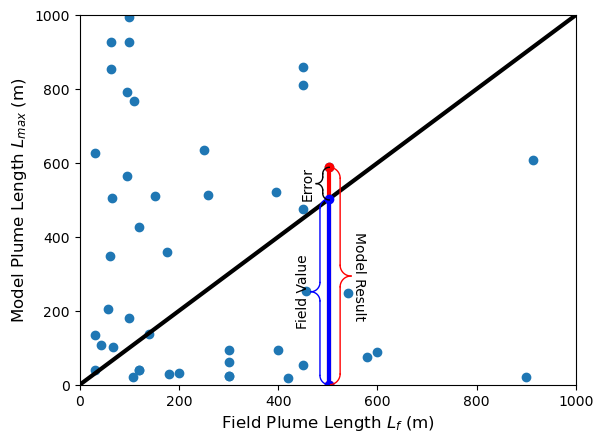

In [231]:
df56 = pd.read_csv("fig5_6_data.csv", sep='\\t', engine='python')
lf = np.array(df56["Field"])
lm = np.array(df56["Model"])

fig, axes = plt.subplots()
axes.scatter(lf, lm)
axes.set_ylim([0,1000])
axes.set_xlim([0,1000])
axes.plot([0,1000],[0,1000], lw = 3, color = "k")  
axes.plot([503,503],[0,588.216], lw = 3, color = "r", marker = "o")  
axes.plot([503,503],[0,503], lw = 3, color = "b", marker = "o")  

# curly bracket 1 start point and end point
p1 = [503, 0]
p2 = [503, 588.216]
k_r1=0.05

p3 = [503, 0]
p4 = [503, 503]

p5 = [503, 500]
p6 = [503, 588.216]
k_r2=0.2

curlyBrace(fig, axes, p2, p1, k_r1, bool_auto=True, str_text="Model Result", color='r', lw=1, int_line_num=1);
curlyBrace(fig, axes, p3, p4, k_r1, bool_auto=True, str_text="Field Value", color='b', lw=1, int_line_num=1);
curlyBrace(fig, axes, p5, p6, k_r2, bool_auto=True, str_text="Error", color='k', lw=1, int_line_num=1);

axes.set_xlabel("Field Plume Length $L_f$ (m)", fontsize=12)
axes.set_ylabel("Model Plume Length $L_{max}$ (m)", fontsize=12)

plt.savefig("fig5.pdf", dpi = 300)
plt.savefig("fig5.png", dpi = 300)

### Fig 6, AIC method

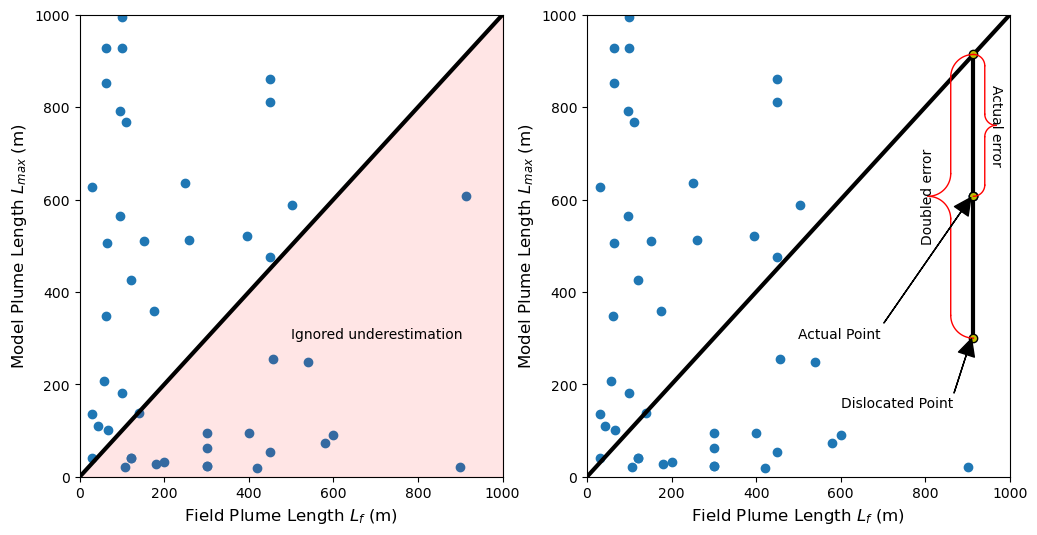

In [233]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].scatter(lf, lm)
axes[0].set_ylim([0,1000])
axes[0].set_xlim([0,1000])
axes[0].plot([0,1000],[0,1000], lw = 3, color = "k")  
pts = np.array([[0,0], [1000,0], [1000,1000]])
p = Polygon(pts, closed=False, color="r", alpha=0.1)
axes[0].add_patch(p) 
axes[0].text(500, 300, "Ignored underestimation")

axes[1].scatter(lf, lm)
axes[1].set_ylim([0,1000])
axes[1].set_xlim([0,1000])
axes[1].plot([0,1000],[0,1000], lw = 3, color = "k")  
axes[1].plot([914, 914],[607.2746,300], lw = 3, color = "k", marker = "o", mfc="y")  
axes[1].plot([914,914],[914,607.2746], lw = 3, color = "k", marker ='o', mfc="y")  

p1 = [914, 914]
p2 = [914, 607]
k_r1=0.08

p3 = [914, 914]
p4 = [914, 300]
k_r2=0.08

curlyBrace(fig, axes[1], p1, p2, k_r1, bool_auto=True, str_text="Actual error", color='r', lw=1, int_line_num=0.1);
curlyBrace(fig, axes[1], p4, p3, k_r2, bool_auto=True, str_text="Doubled error", color='r', lw=1, int_line_num=0.1);

axes[1].annotate('Dislocated Point', xy=(910, 300), xytext=(600, 150),arrowprops=dict(facecolor='black', shrink=0.01, width=0.01))
axes[1].annotate('Actual Point', xy=(910, 607), xytext=(500, 300),arrowprops=dict(facecolor='black', shrink=0.01, width=0.01))

axes[0].set_xlabel("Field Plume Length $L_f$ (m)", fontsize=12)
axes[0].set_ylabel("Model Plume Length $L_{max}$ (m)", fontsize=12)
axes[1].set_xlabel("Field Plume Length $L_f$ (m)", fontsize=12)
axes[1].set_ylabel("Model Plume Length $L_{max}$ (m)", fontsize=12)

plt.savefig("fig6.pdf", dpi = 300)
plt.savefig("fig6.png", dpi = 300)

## **3. AHP Method**

**AHP Scheme - Fig. 7**


![AHP scheme](fig7.png)

In [236]:
#main code for calculating weight vector and checking consistency

def AHP_wt_cal(pair_mat):
    
    nr = np.shape(pair_mat)[0] # find the shape of aquare matrix and take the nr. of rows
    
    sumvec_mat=pair_mat.sum(axis=0) # create a column vector - sum columnwise
    normat_mat =pair_mat/sumvec_mat # normalize the pair matrix with sumvec vector
    
    eig_vec_mat = normat_mat.sum(axis=1)/nr # obtain the eig_vec
    eig_max_mat = np.dot(sumvec_mat, eig_vec_mat).sum() # obtain max eigvec
    
    # Consistency check
    
    ri = {1:0.0,2:0.0,3:0.52,4:0.89,5:1.11,6:1.25,7:1.35,8:1.40,9:1.45,10:1.49}
    ci = (eig_max_mat-nr)/(nr-1)
    cr = ci/ri[nr] 
    
    #if cr<0.1:
    print ("Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix")
    print ("Number of comparison targets:", nr)
    print ("Max eigenvalue:", round(eig_max_mat, 2))
    print ("Consistency index CI:", round(ci, 2))
    print ("Consistency rate CR:", round(cr, 2))
    
    print("================================================================================\n")
    print(eig_vec_mat)
    print("================================================================================\n")
    return(eig_vec_mat, cr)

### Scenario 1 (Used in the main development part of the paper)

In [238]:
# Input Pairwise Matrices
# order for eval: UE, OE, GF, PC
# Order for Model: L, MA,H, C

eval_mat1 = np.array([[1, 5, 3, 7],[1/5, 1, 1/3, 3],[1/3, 3, 1, 5], [1/7, 1/3, 1/5, 1]]) # evaluation matrix
ue_mat1 = np.array([[1, 1, 9, 5],[1, 1, 9, 5], [1/9, 1/9, 1, 1/5], [1/5, 1/5, 5, 1]]) # Underestimation - model matrix
oe_mat1 = np.array([[1, 6, 1/2, 2],[1/6, 1, 1/7, 1/4], [2, 7, 1, 5], [1/2, 4, 1/5, 1]]) # Overestimation - model matrix
gf_mat1 = np.array([[1,2,7,9],[1/2,1,6,8], [1/7, 1/6, 1, 3], [1/9, 1/8, 1/3, 1]]) # Goodness of fit - model matrix
pc_mat1 = np.array([[1,1,1/5, 5],[1,1,1/5, 5], [5,5,1,9], [1/5,1/5,1/9, 1]]) # Parameter number and complexity matrix

In [239]:
#execute for obtaining weight vector
[E1_1, E1_1_cr] = AHP_wt_cal(eval_mat1)
[C1_1, C1_1_cr] = AHP_wt_cal(ue_mat1)
[C2_1, C2_1_cr] = AHP_wt_cal(oe_mat1)
[C3_1, C3_1_cr] = AHP_wt_cal(gf_mat1)
[C4_1, C4_1_cr] = AHP_wt_cal(pc_mat1)

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.18
Consistency index CI: 0.06
Consistency rate CR: 0.07

[0.55789248 0.12187261 0.26334511 0.0568898 ]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.2
Consistency index CI: 0.07
Consistency rate CR: 0.08

[0.4217033  0.4217033  0.03891941 0.11767399]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.14
Consistency index CI: 0.05
Consistency rate CR: 0.05

[0.27995067 0.05220813 0.52075992 0.14708128]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.2
Consistency index CI: 0.07
Consistency rate CR: 0.08

[0.52366855 0.34710559 0.08617636 0.04304949]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
N

### AHP Calculation steps

In [241]:
# joining vector to form criteria matrix
crit_mat_1 = np.transpose(np.array([C1_1, C2_1, C3_1, C4_1])) # transpose to convert rows to vector; and making matrix
crit_mat_1 # criteria weight matrix

# obtaining rank
AHP_rank_s1 = np.matmul(crit_mat_1,E1_1) # multiplying pairwise with eval-matrix
AHP_rank_s1 

array([0.41667764, 0.34242507, 0.14343877, 0.09745851])

### Fig. 8 AHP Figures

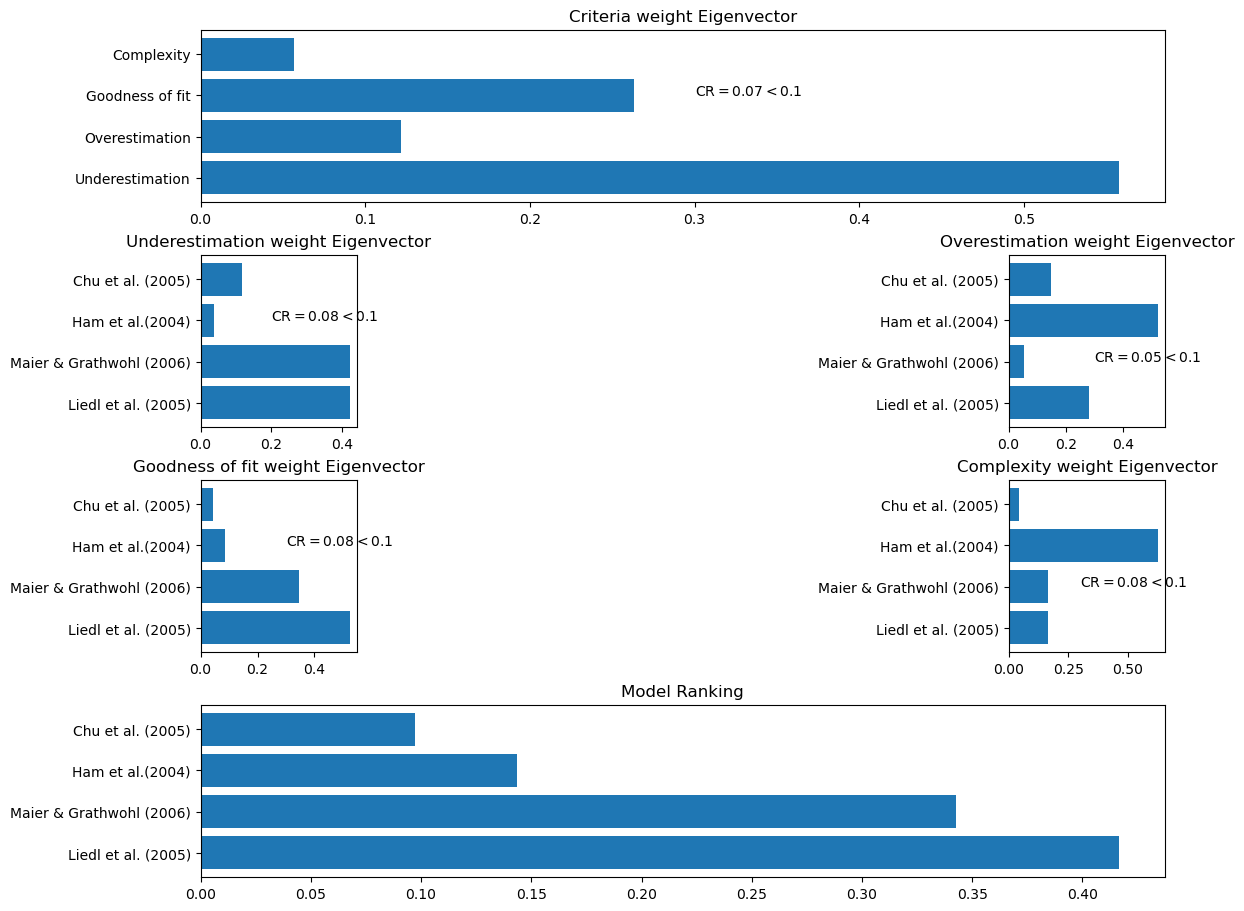

In [243]:
# Plots

Models = ('Liedl et al. (2005)', 'Maier & Grathwohl (2006)', 'Ham et al.(2004)', 'Chu et al. (2005)')
Criteria = ("Underestimation", "Overestimation", "Goodness of fit", "Complexity")

fig = plt.figure(figsize=(12,9), constrained_layout=True)
gs = fig.add_gridspec(4, 3)
f_ax1 = fig.add_subplot(gs[0, :])
f_ax1.barh(Criteria, E1_1) 
f_ax1.text(0.3, 2, ('CR$=%.2f<0.1$' % round(E1_1_cr, 2)))
f_ax1.set_title("Criteria weight Eigenvector")

f_ax2 = fig.add_subplot(gs[1, :1])
f_ax2.barh(Models, C1_1) 
f_ax2.text(0.2, 2, ('CR$=%.2f<0.1$' % round(C1_1_cr, 2)))
f_ax2.set_title("Underestimation weight Eigenvector")

f_ax3 = fig.add_subplot(gs[1, -1])
f_ax3.barh(Models, C2_1) 
f_ax3.text(0.3, 1,('CR$=%.2f<0.1$' % round(C2_1_cr, 2)))
f_ax3.set_title("Overestimation weight Eigenvector")

f_ax4 = fig.add_subplot(gs[-2, 0])
f_ax4.barh(Models, C3_1) 
f_ax4.text(0.3, 2, ('CR$=%.2f<0.1$' % round(C3_1_cr, 2)))
f_ax4.set_title("Goodness of fit weight Eigenvector")

f_ax5 = fig.add_subplot(gs[2, -1])
f_ax5.barh(Models, C4_1) 
f_ax5.text(0.3, 1, ('CR$=%.2f<0.1$' % round(C4_1_cr, 2)))
f_ax5.set_title("Complexity weight Eigenvector")

f_ax6 = fig.add_subplot(gs[3, :])
f_ax6.barh(Models, AHP_rank_s1) 
f_ax6.set_title("Model Ranking")

plt.savefig("fig8_1.pdf", dpi=300)
plt.savefig("fig8_1.png", dpi=300)

### Fig 9 AHP- result interpretation

![](fig9.png)

## Scenario 2:

### Far urban area

### Overestimation threshold: 0.01 % probality

#### Statistical Method:

0.9999094138546534


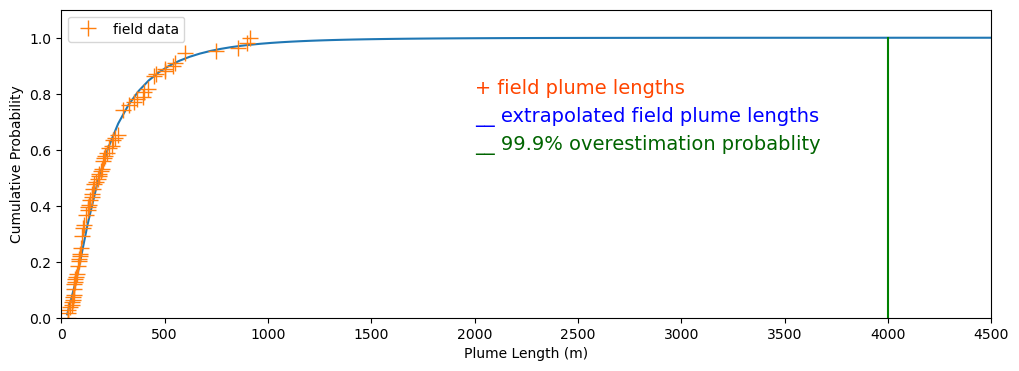

In [247]:
scatter,location,mean = stats.lognorm.fit(y,floc=0)
x = np.linspace(y.min()-2,y.max()+4000,100)
pdf = stats.lognorm.pdf(x,scatter,location,mean)
cdf=stats.lognorm.cdf(x, scatter, location, mean)


cdf4000=stats.lognorm.cdf(4000, scatter, location, mean)

(1-cdf4000)*100

y4000=np.linspace(0,cdf4000, 100)
x4000=np.linspace(4000, 4000, 100)


plt.figure(figsize=(12, 4))
plt.plot(x, cdf)
plt.plot(x4000,y4000, 'green')
plot_ecdf(y)
plt.xlim([0, 4500])
plt.ylim([0,1.1])
plt.xlabel("Plume Length (m)")
plt.ylabel("Cumulative Probability")

h1=2000
v1=0.8
plt.text(h1, v1, "+ field plume lengths", {'color': 'orangered', 'fontsize': 14})
plt.text(h1, v1-0.1, "__ extrapolated field plume lengths", {'color': 'blue', 'fontsize': 14})
plt.text(h1, v1-0.2, "__ 99.9% overestimation probablity", {'color': 'darkgreen', 'fontsize': 14})

print(cdf4000)

### Fig 10.a Scenario 2 - Statistical

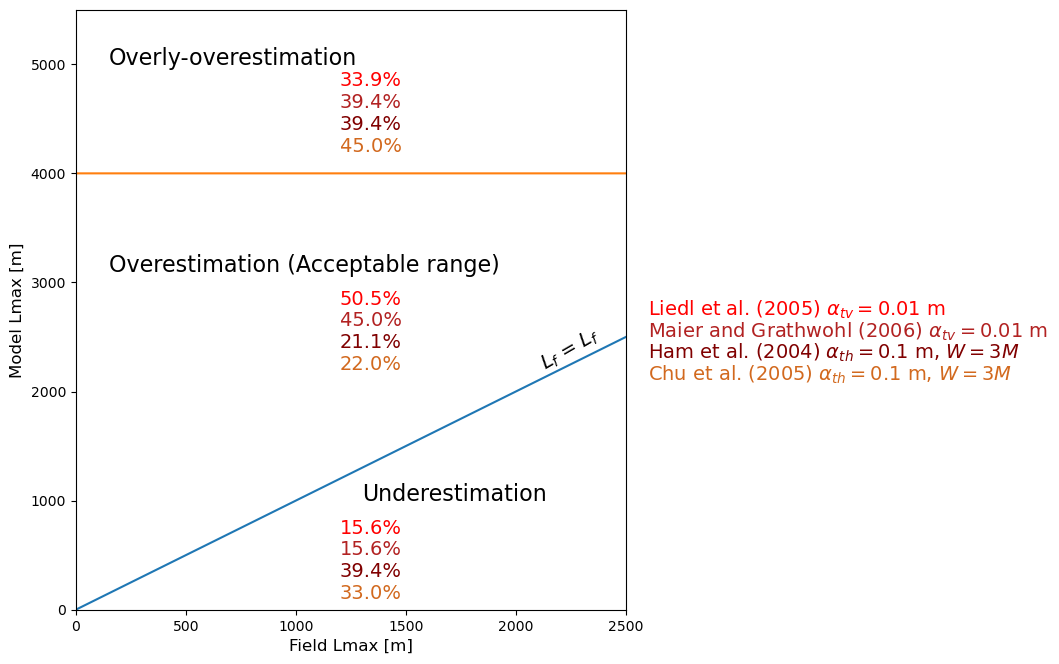

In [249]:
plt.figure(figsize=(11,8))
x=np.linspace(0,2500, 2500)
y45=x
yt=np.linspace(4000,4000,len(x))
plt.plot(x,y45)
plt.plot(x, yt)
plt.ylim(0, 3500)
plt.text(1300, 1000, "Underestimation", fontsize=16)
plt.text(150, 3100, "Overestimation (Acceptable range)", fontsize=16)
plt.text(150, 5000, "Overly-overestimation", fontsize=16)
plt.xlim([0, 2500])
plt.ylim([0, 5500])

#Overestimation
h1=1200
v1=4800
plt.text(h1, v1, "33.9%", {'color': 'r', 'fontsize': 14})
plt.text(h1, v1-200, "39.4%", {'color': 'firebrick', 'fontsize': 14})
plt.text(h1, v1-400, "39.4%", {'color': 'maroon', 'fontsize': 14})
plt.text(h1, v1-600, "45.0%", {'color': 'chocolate', 'fontsize': 14})


# Acceptable Range
h3=1200
v3=2800
plt.text(h3, v3, "50.5%", {'color': 'r', 'fontsize': 14})
plt.text(h3, v3-200, "45.0%", {'color': 'firebrick', 'fontsize': 14})
plt.text(h3, v3-400, "21.1%", {'color': 'maroon', 'fontsize': 14})
plt.text(h3, v3-600, "22.0%", {'color': 'chocolate', 'fontsize': 14})


#Underestimation
h5=1200
v5=700
plt.text(h5, v5, "15.6%", {'color': 'r', 'fontsize': 14})
plt.text(h5, v5-200, "15.6%", {'color': 'firebrick', 'fontsize': 14})
plt.text(h5, v5-400, "39.4%", {'color': 'maroon', 'fontsize': 14})
plt.text(h5, v5-600, "33.0%", {'color': 'chocolate', 'fontsize': 14})



plt.text(2600, 2700, "Liedl et al. (2005) $\u03B1_{tv}=0.01$ m ", {'color': 'r', 'fontsize': 14})
plt.text(2600, 2500, "Maier and Grathwohl (2006) $\u03B1_{tv}=0.01$ m ", {'color': 'firebrick', 'fontsize': 14})
plt.text(2600, 2300, "Ham et al. (2004) $\u03B1_{th}=0.1$ m, $W=3M$", {'color': 'maroon', 'fontsize': 14})
plt.text(2600, 2100, "Chu et al. (2005) $\u03B1_{th}=0.1$ m, $W=3M$", {'color': 'chocolate', 'fontsize': 14})

plt.xlabel("Field Lmax [m]", fontsize=12)
plt.ylabel("Model Lmax [m]", fontsize=12)
plt.subplots_adjust(left=0.1, right=0.6, top=0.85, bottom=0.1)

plt.annotate('$L_f$ = $L_f$', fontsize=14,
             xy=(2100, 2150),                    
             rotation=30,                  
             va='bottom',                    
             ha='left',                      
            )

plt.savefig("StatisticalResultScenario2.png", dpi=300)

### Fig 10.b Scenario 2 - AHP

In [251]:
# Input Pairwise Matrices
# order for eval: UE, OE, GF, PC
# Order for Model: L, MA,H, C

 
eval_mat_2 = np.array([[1, 8, 2, 6],[1/8, 1, 1/6, 1/2],[1/2, 6, 1, 5], [1/6, 2, 1/5, 1]]) # evaluation matrix
ue_mat_2 = np.array([[1,1,9,5],[1,1,9,5], [1/9, 1/9, 1, 1/5], [1/5, 1/5, 5, 1]]) # Underestimation - model matrix
oe_mat_2 = np.array([[1,1,1,4],[1,1,1,3], [1, 1, 1, 4], [1/4, 1/3, 1/4, 1]]) # Overestimation - model matrix
gf_mat_2 = np.array([[1,2,7,9],[1/2,1,6,8], [1/7, 1/6, 1, 3], [1/9, 1/8, 1/3, 1]]) # Goodness of fit - model matrix
pc_mat_2 = np.array([[1,1,1/5, 5],[1,1,1/5, 5], [5,5,1,9], [1/5,1/5,1/9, 1]]) # Parameter number and complexity matrix

In [252]:
[E1_2, E1_2_cr] = AHP_wt_cal(eval_mat_2)
[C1_2, C1_2_cr] = AHP_wt_cal(ue_mat_2)
[C2_2, C2_2_cr] = AHP_wt_cal(oe_mat_2)
[C3_2, C3_2_cr] = AHP_wt_cal(gf_mat_2)
[C4_2, C4_2_cr] = AHP_wt_cal(pc_mat_2)

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.08
Consistency index CI: 0.03
Consistency rate CR: 0.03

[0.52569679 0.05452398 0.33226016 0.08751906]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.2
Consistency index CI: 0.07
Consistency rate CR: 0.08

[0.4217033  0.4217033  0.03891941 0.11767399]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.01
Consistency index CI: 0.0
Consistency rate CR: 0.0

[0.31217949 0.29134615 0.31217949 0.08429487]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.2
Consistency index CI: 0.07
Consistency rate CR: 0.08

[0.52366855 0.34710559 0.08617636 0.04304949]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Num

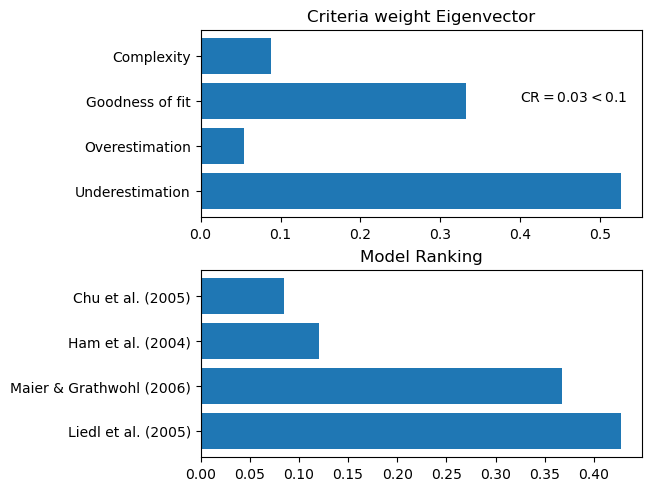

In [253]:
# run this to join vector and obtain criteria matrix 
# joining vector to form criteria matrix
crit_mat_2 = np.transpose(np.array([C1_2, C2_2, C3_2, C4_2])) # transpose to convert rows to vector; and making matrix
crit_mat_2 # criteria weight matrix

AHP_rank_s2 = np.matmul(crit_mat_2,E1_2) # multiplying pairwise with eval-matrix
AHP_rank_s2 

#plot in MS Scenario 2
Models = ('Liedl et al. (2005)', 'Maier & Grathwohl (2006)', 'Ham et al. (2004)', 'Chu et al. (2005)')
Criteria = ("Underestimation", "Overestimation", "Goodness of fit", "Complexity")

fig, ax = plt.subplots(2,1, constrained_layout=True)

ax[0].barh(Criteria, E1_2) 
ax[0].text(0.4, 2, ('CR$=%.2f<0.1$' % (round(E1_2_cr, 2))))
ax[0].set_title("Criteria weight Eigenvector")

ax[1].barh(Models, AHP_rank_s2) 
ax[1].set_title("Model Ranking")
plt.savefig("fig10_2.pdf")
plt.savefig("fig10_2.png")

## Scenario 3:

### Dense Urban Area

### Overestimation threshold: 1 % probality : Fig 11. a

0.990287856495408


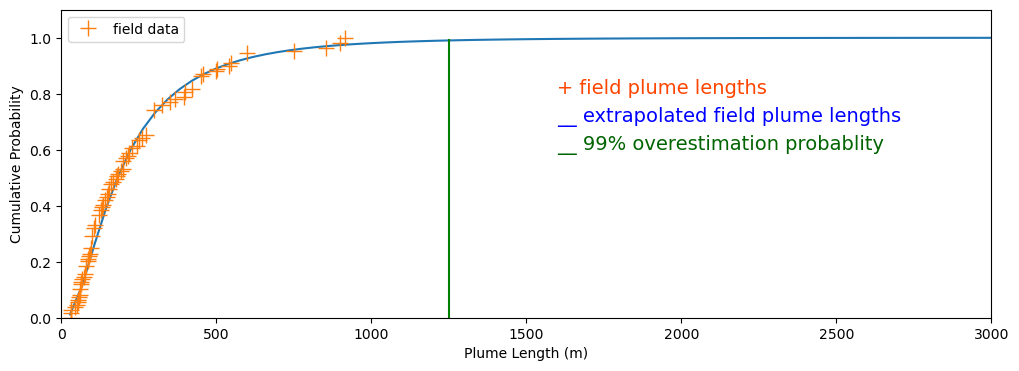

In [255]:
scatter,location,mean = stats.lognorm.fit(y,floc=0)
x = np.linspace(y.min()-2,y.max()+3000,100)
pdf = stats.lognorm.pdf(x,scatter,location,mean)
cdf=stats.lognorm.cdf(x, scatter, location, mean)


cdf1250=stats.lognorm.cdf(1250, scatter, location, mean)

(1-cdf1250)*100


y1250=np.linspace(0,cdf1250, 100)
x1250=np.linspace(1250,1250,100)


plt.figure(figsize=(12, 4))
plt.plot(x, cdf)
#plt.plot(x2, cdf2, "+")
plt.plot(x1250,y1250,'green')
plot_ecdf(y)
plt.xlim([0, 3000])
plt.ylim([0,1.1])
plt.xlabel("Plume Length (m)")
plt.ylabel("Cumulative Probability")

h1=1600
v1=0.8
plt.text(h1, v1, "+ field plume lengths", {'color': 'orangered', 'fontsize': 14})
plt.text(h1, v1-0.1, "__ extrapolated field plume lengths", {'color': 'blue', 'fontsize': 14})
plt.text(h1, v1-0.2, "__ 99% overestimation probablity", {'color': 'darkgreen', 'fontsize': 14})

print(cdf1250)

plt.savefig("CDFScenario3.png")

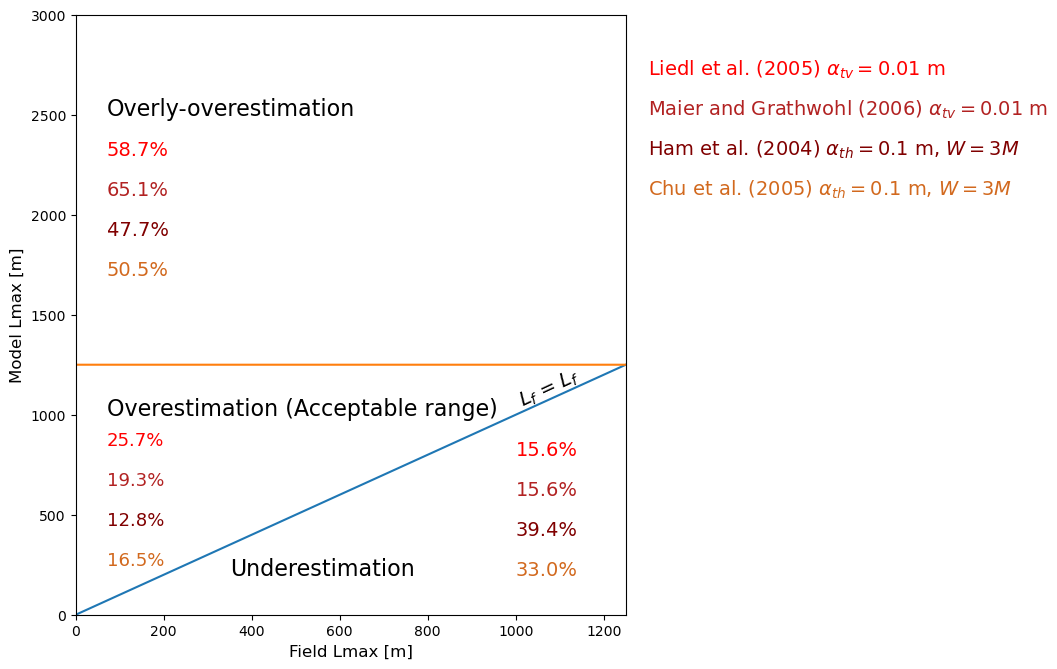

In [256]:
plt.figure(figsize=(11,8))
x=np.linspace(0,2000, 2000)
y45=x
yt=np.linspace(1250,1250,len(x))
plt.plot(x,y45)
plt.plot(x, yt)
plt.ylim(0, 2000)
plt.text(350, 200, "Underestimation", fontsize=16)
plt.text(70, 1000, "Overestimation (Acceptable range)", fontsize=16)
plt.text(70, 2500, "Overly-overestimation", fontsize=16)
plt.xlim([0, 1250])
plt.ylim([0, 3000])

#Overestimation
h1=70
v1=2300
plt.text(h1, v1, "58.7%", {'color': 'r', 'fontsize': 14})
plt.text(h1, v1-200, "65.1%", {'color': 'firebrick', 'fontsize': 14})
plt.text(h1, v1-400, "47.7%", {'color': 'maroon', 'fontsize': 14})
plt.text(h1, v1-600, "50.5%", {'color': 'chocolate', 'fontsize': 14})


# Acceptable Range
h3=70
v3=850
plt.text(h3, v3, "25.7%", {'color': 'r', 'fontsize': 13})
plt.text(h3, v3-200, "19.3%", {'color': 'firebrick', 'fontsize': 13})
plt.text(h3, v3-400, "12.8%", {'color': 'maroon', 'fontsize': 13})
plt.text(h3, v3-600, "16.5%", {'color': 'chocolate', 'fontsize': 13})



#Underestimation
h5=1000
v5=800
plt.text(h5, v5, "15.6%", {'color': 'r', 'fontsize': 14})
plt.text(h5, v5-200, "15.6%", {'color': 'firebrick', 'fontsize': 14})
plt.text(h5, v5-400, "39.4%", {'color': 'maroon', 'fontsize': 14})
plt.text(h5, v5-600, "33.0%", {'color': 'chocolate', 'fontsize': 14})



plt.text(1300, 2700, "Liedl et al. (2005) $\u03B1_{tv}=0.01$ m ", {'color': 'r', 'fontsize': 14})
plt.text(1300, 2500, "Maier and Grathwohl (2006) $\u03B1_{tv}=0.01$ m", {'color': 'firebrick', 'fontsize': 14})
plt.text(1300, 2300, "Ham et al. (2004) $\u03B1_{th}=0.1$ m, $W=3M$", {'color': 'maroon', 'fontsize': 14})
plt.text(1300, 2100, "Chu et al. (2005) $\u03B1_{th}=0.1$ m, $W=3M$", {'color': 'chocolate', 'fontsize': 14})

plt.xlabel("Field Lmax [m]", fontsize = 12)
plt.ylabel("Model Lmax [m]", fontsize = 12)
plt.subplots_adjust(left=0.1, right=0.6, top=0.85, bottom=0.1)

plt.annotate('$L_f$ = $L_f$', fontsize=14,
             xy=(1000, 1020),                    
             rotation=25,                  
             va='bottom',                    
             ha='left',                      
            )

plt.savefig("StatisticalResultScenario3.png", dpi=300)

### Fig. 10b- AHP

In [258]:
# Input Pairwise Matrices
# order for eval: UE, OE, GF, PC
# Order for Model: L, MA,H, C
# PLS. PROVIDE THESE MATRICES- I COULD NOT FIND 
eval_mat_3 = np.array([[1  , 1,    3, 7],[1, 1, 3, 7],[1/3, 1/3, 1, 5], [1/7, 1/7, 1/5, 1]]) # evaluation matrix
ue_mat_3 = np.array([[1,1,9,5],[1,1,9,5], [1/9, 1/9, 1, 1/5], [1/5, 1/5, 5, 1]]) # Underestimation - model matrix
oe_mat_3 = np.array([[1,3,1/4,1/5],[1/3,1,1/6,1/7], [4, 6, 1, 1/2], [5, 7, 2, 1]]) # Overestimation - model matrix
gf_mat_3 = np.array([[1,2,7,9],[1/2,1,6,8], [1/7, 1/6, 1, 3], [1/9, 1/8, 1/3, 1]]) # Goodness of fit - model matrix
pc_mat_3 = np.array([[1,1,1/5, 5],[1,1,1/5, 5], [5,5,1,9], [1/5,1/5,1/9, 1]]) # Parameter number and complex ity matrix

In [259]:
### Scenario 3 (please complete this)# run this to obtain weigth vector
#E1_3 = AHP_wt_cal(eval_mat_3)
#C1_3 = AHP_wt_cal(ue_mat_3)
#C2_3 = AHP_wt_cal(oe_mat_3)
#C3_3 = AHP_wt_cal(gf_mat_3)
#C4_3 = AHP_wt_cal(pc_mat_3)

[E1_3, E1_3_cr] = AHP_wt_cal(eval_mat_3)
[C1_3, C1_3_cr] = AHP_wt_cal(ue_mat_3)
[C2_3, C2_3_cr] = AHP_wt_cal(oe_mat_3)
[C3_3, C3_3_cr] = AHP_wt_cal(gf_mat_3)
[C4_3, C4_3_cr] = AHP_wt_cal(pc_mat_3)

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.1
Consistency index CI: 0.03
Consistency rate CR: 0.04

[0.39358974 0.39358974 0.16452991 0.0482906 ]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.2
Consistency index CI: 0.07
Consistency rate CR: 0.08

[0.4217033  0.4217033  0.03891941 0.11767399]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.15
Consistency index CI: 0.05
Consistency rate CR: 0.05

[0.11373566 0.05434537 0.32600968 0.5059093 ]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Number of comparison targets: 4
Max eigenvalue: 4.2
Consistency index CI: 0.07
Consistency rate CR: 0.08

[0.52366855 0.34710559 0.08617636 0.04304949]

Evaluate consistency. If CI> 0.1 (or CI> 0.15), modify the comparison matrix
Nu

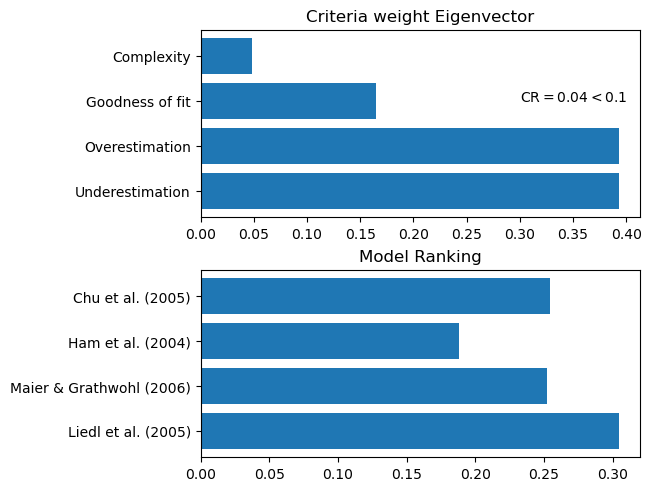

In [260]:
# joining vector to form criteria matrix
crit_mat_3 = np.transpose(np.array([C1_3, C2_3, C3_3, C4_3])) # transpose to convert rows to vector; and making matrix
crit_mat_3 # criteria weight matrix
# run this to obtain rank
AHP_rank_s3 = np.matmul(crit_mat_3, E1_3) # multiplying pairwise with eval-matrix
AHP_rank_s3 

#plot in MS Scenario 3
Models = ('Liedl et al. (2005)', 'Maier & Grathwohl (2006)', 'Ham et al. (2004)', 'Chu et al. (2005)')
Criteria = ("Underestimation", "Overestimation", "Goodness of fit", "Complexity")

fig, ax = plt.subplots(2,1, constrained_layout=True)

ax[0].barh(Criteria, E1_3) 
ax[0].text(0.3, 2, ('CR$=%.2f<0.1$' % round(E1_3_cr, 2)))
ax[0].set_title("Criteria weight Eigenvector")

ax[1].barh(Models, AHP_rank_s3) 
ax[1].set_title("Model Ranking")
plt.savefig("fig11_2.pdf", dpi=800)
plt.savefig("fig11_2.png", dpi=800)